# Weekly Activity

1. Create a random noise color and grayscale image. You can set your own width and height, but keep the total number of pixels of both images identical.

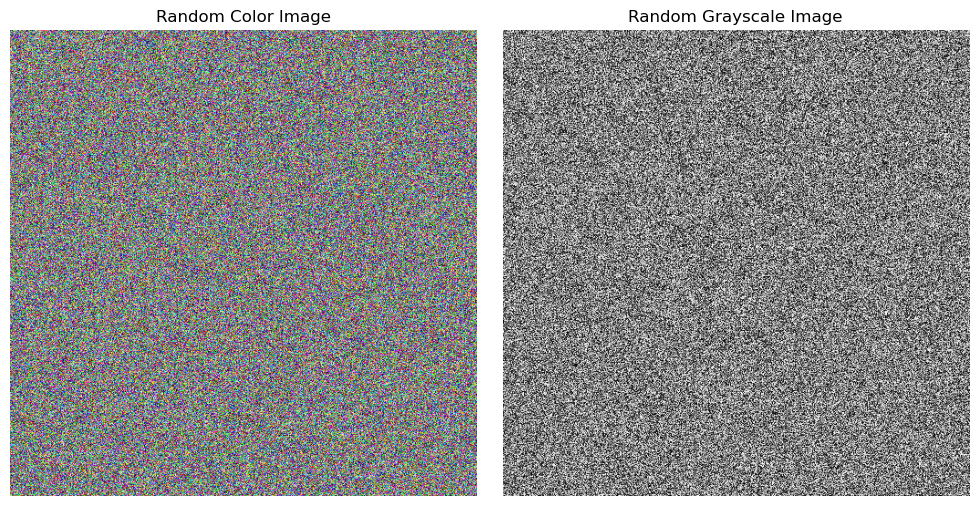

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the size of the images
width = 512
height = 512
total_pixels = width * height

# Generate random noise images
# Color image (RGB)
random_color_image = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)

# Grayscale image
random_gray_image = np.random.randint(0, 256, (height, width), dtype=np.uint8)

# Display the images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(random_color_image)
plt.title('Random Color Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(random_gray_image, cmap='gray')
plt.title('Random Grayscale Image')
plt.axis('off')

plt.tight_layout()
plt.show()

2. Convert the code chunk found under section Divide an image into smaller patches using cropping into a function with the following signature:
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
```python
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
```

In [13]:
import numpy as np
import cv2 as cv

def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color=(0, 0, 255)):
    """
    Divide an image into a grid of smaller patches with grid lines.

    Parameters:
    - img: The source image (numpy array, BGR format for OpenCV).
    - num_horizontal_grid: Number of patches along the horizontal axis.
    - num_vertical_grid: Number of patches along the vertical axis.
    - line_color: Color of the grid lines in BGR format (default: red).

    Returns:
    - img_with_grid: Image with grid lines drawn, or None if image loading fails.
    """

    if img is None:
        print("Error: Image is None. Please check the image path.")
        return None

    # Make a copy of the original image to draw grid lines on
    img_with_grid = img.copy()

    # Get image dimensions
    height, width = img.shape[:2]

    # Calculate the size of each grid cell
    cell_width = width // num_horizontal_grid
    cell_height = height // num_vertical_grid

    # Draw vertical grid lines
    for i in range(1, num_horizontal_grid):
        x = i * cell_width
        cv.line(img_with_grid, (x, 0), (x, height), line_color, 1)

    # Draw horizontal grid lines
    for j in range(1, num_vertical_grid):
        y = j * cell_height
        cv.line(img_with_grid, (0, y), (width, y), line_color, 1)

    return img_with_grid

# Example usage:
if __name__ == "__main__":
    img = cv.imread("images/lena.jfif")

    if img is None:
        print("Error: Could not load image.")
    else:
        # Number of grid divisions
        num_horizontal_grid = 4
        num_vertical_grid = 3

        # Color of grid lines (BGR format)
        line_color = (0, 255, 0)  # Green

        # Apply grid function
        img_with_grid = crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)

        if img_with_grid is not None:
            # Display the original image and the image with grid
            cv.imshow('Original Image', img)
            cv.imshow('Image with Grid', img_with_grid)
            cv.waitKey(0)
            cv.destroyAllWindows()

3. How would you change the brightness of a color image? Suggest two ways to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.

In [15]:
img = cv.imread("images/lena.jfif")

# Method 1: Direct pixel value adjustment
def adjust_brightness_direct(image, alpha, beta):
    """
    Adjust the brightness of an image using direct pixel value adjustment.

    Parameters:
    - image: Input image (numpy array).
    - alpha: Contrast control (1.0-3.0 typically).
    - beta: Brightness control (0-100 typically).

    Returns:
    - brightened_img: Brightened image.
    """
    brightened_img = np.clip(alpha * image + beta, 0, 255).astype(np.uint8)
    return brightened_img

# Adjust brightness (increase by 50)
brightened_img_direct = adjust_brightness_direct(img, 1.0, 50)

# Display original and brightened images
cv.imshow('Original Image', img)
cv.imshow('Brightened Image (Direct)', brightened_img_direct)
cv.waitKey(0)
cv.destroyAllWindows()

In [16]:
img = cv.imread("images/lena.jfif")

# Method 2: HSV color space adjustment
def adjust_brightness_hsv(image, value):
    """
    Adjust the brightness of an image using HSV color space.

    Parameters:
    - image: Input image (numpy array).
    - value: Brightness adjustment value (-100 to 100).

    Returns:
    - brightened_img: Brightened image.
    """
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)
    v = np.clip(v + value, 0, 255).astype(np.uint8)
    hsv = cv.merge((h, s, v))
    brightened_img = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
    return brightened_img

# Adjust brightness (increase by 50)
brightened_img_hsv = adjust_brightness_hsv(img, 50)

# Display original and brightened images
cv.imshow('Original Image', img)
cv.imshow('Brightened Image (HSV)', brightened_img_hsv)
cv.waitKey(0)
cv.destroyAllWindows()

4. Provide at least one common use cases for the following color spaces:
    - RGB
    - HSV
    - CIELAB

In [18]:
# RGB
# Load an example image in BGR format
img_bgr = cv.imread("images/lena.jfif")

# Convert BGR to RGB
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)

# Display original and RGB converted images
cv.imshow('Original Image (BGR)', img_bgr)
cv.imshow('RGB Image', img_rgb)
cv.waitKey(0)
cv.destroyAllWindows()

In [19]:
#HSV
# Load an example image in BGR format
img_bgr = cv.imread("images/lena.jfif")

# Convert BGR to HSV
img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)

# Define range of blue color in HSV
lower_blue = np.array([110, 50, 50])
upper_blue = np.array([130, 255, 255])

# Threshold the HSV image to get only blue colors
mask = cv.inRange(img_hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
img_blue = cv.bitwise_and(img_bgr, img_bgr, mask=mask)

# Display original, HSV converted, and blue color segmented images
cv.imshow('Original Image (BGR)', img_bgr)
cv.imshow('HSV Image', img_hsv)
cv.imshow('Blue Color Segmented', img_blue)
cv.waitKey(0)
cv.destroyAllWindows()

In [20]:
#CIELAB
# Load an example image in BGR format
img_bgr = cv.imread("images/lena.jfif")

# Convert BGR to CIELAB
img_lab = cv.cvtColor(img_bgr, cv.COLOR_BGR2LAB)

# Display original and CIELAB converted images
cv.imshow('Original Image (BGR)', img_bgr)
cv.imshow('CIELAB Image', img_lab)
cv.waitKey(0)
cv.destroyAllWindows()